### Signal Modelling

Author: Arun Prakash A, arunprakash.ece@kongu.ac.in

 * Modelling a signal using a ARMA or AR process.
 * Given Signal(vector) could be thought of as an impulse response of a filter.
 * The goal is to estimate the filter coefficients either using non-linear or linear approaches.

In [1]:
import numpy as np
from scipy import linalg as lalg
from scipy import signal as sig
from matplotlib import pyplot as plt

**Pade Approximation**
 
 * Suitable to obtain **exact value** of first $p+q$ samples of a signal.
 * Obtained Values beyond $p+q$ samples may deviate more from the original values. 
 * We may use any of the three models: AR,ARMA,MA with a respective rational transfer function.
 * Using AR is most common because of its tractability.

Approximation with **AR(p)** model 

In [2]:
def pade_allpole(x,p):
    '''
    x --> an input signal (vector) to be generated
    p --> order of the all pole model
    ap_k <-- fitler coefficients of  [a(1),a(2)...,a(p)]
    
    Ensure the filter order doesn't exceed the number of elements in an input vector
    '''
    x_right=x[1:p+1]
    x_left = x[0:p]
    x_toep = lalg.toeplitz(x_left)
    X = lalg.tril(x_toep,k=0)  # set upper triangular to zero
    ap_k = lalg.solve(X,-1*x_right)    
    return ap_k
    

In [3]:
x = np.array([1,1.5,0.75,0.375,0.1875,0.0938])
ap_k = pade_allpole(x,5)
den_coef = np.insert(ap_k,0,1) # The coefficient for z^0 is 1
print(den_coef)

[ 1.      -1.5      1.5     -1.5      1.5     -1.50005]


In [4]:
num_coef = np.array([1])
impulse = np.array([1,0,0,0,0,0])
yn = sig.lfilter(num_coef,den_coef,impulse) # generate impulse response
print(yn)


[1.     1.5    0.75   0.375  0.1875 0.0938]


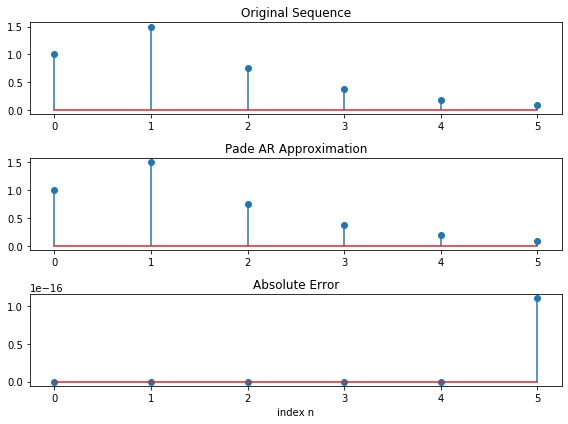

In [5]:
fig,ax = plt.subplots(3,1,figsize=(8,6))
ax[0].stem(x,use_line_collection=True)
ax[1].stem(yn,use_line_collection=True)
ax[2].stem(np.abs(yn-x),use_line_collection=True)
ax[0].set_title('Original Sequence')
ax[1].set_title('Pade AR Approximation')
ax[2].set_title('Absolute Error')
ax[2].set_xlabel('index n')
fig.tight_layout()

Approximation with **ARMA(p,q)** model

In [6]:
def pole_zero(x,p,q):
    '''
    x --> an input signal (vector) to be generated
    p --> order of the all pole model
    ap_k <-- fitler coefficients of  [a(1),a(2)...,a(p)]
    
    Ensure the filter order doesn't exceed the number of elements in an input vector
    '''
    # solving for denominator coeff
    if p+q >= len(x):
        raise Exception("p+q can't be greater than length of x")
            
    x_right=x[q+1:q+p+1]
    x_left = x[q:q+p]
    x_toep = lalg.toeplitz(x_left)
    X = lalg.tril(x_toep,k=0)
    ap_k = lalg.solve(X,-1*x_right) 
    a = np.insert(ap_k,0,1)
    
    # solving for numerator coeff
    x_left = x[0:q+1]
    x_toep = lalg.toeplitz(x_left)
    X = lalg.tril(x_toep,k=0)
    b = np.matmul(X,a)
    
    return (b,a)

In [7]:
(num,den) = pole_zero(x,2,2)
print(num,den)

[1. 1. 0.] [ 1.  -0.5  0. ]


In [8]:
yn = sig.lfilter(num,den,impulse)

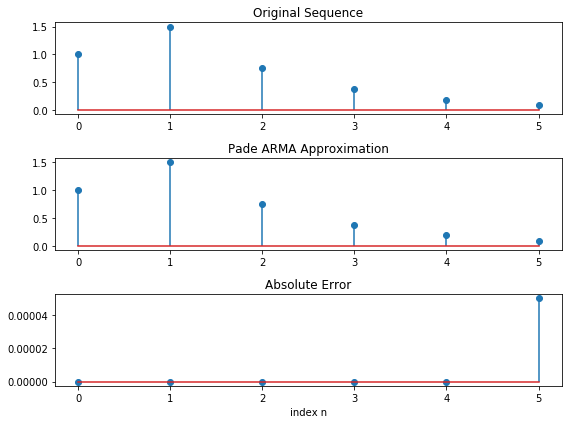

In [9]:
fig,ax = plt.subplots(3,1,figsize=(8,6))
ax[0].stem(x,use_line_collection=True)
ax[1].stem(yn,use_line_collection=True)
ax[2].stem(np.abs(yn-x),use_line_collection=True)
ax[0].set_title('Original Sequence')
ax[1].set_title('Pade ARMA Approximation')
ax[2].set_title('Absolute Error')
ax[2].set_xlabel('index n')
fig.tight_layout()

Pade Approximation works for any length as long as the signal to be modeled is **deterministic** and **The matrix** is non-singular. The approximation is not suitable for random signals (**Because of the condition that the impulse response of  IIR or FIR filters must converge to zero**).<br>





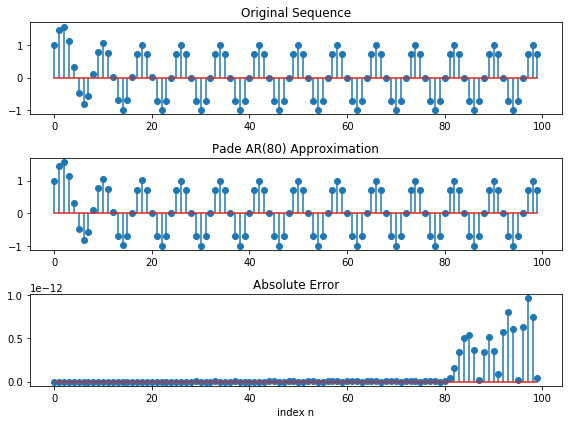

In [10]:
n = np.arange(100)
x = np.sin(0.25*np.pi*n)+(0.75)**n
ap_k = pade_allpole(x,80)
den_coef = np.insert(ap_k,0,1) 
num_coef = np.array([1])
impulse = np.zeros(100)
impulse[0]=1
yn = sig.lfilter(num_coef,den_coef,impulse)
fig,ax = plt.subplots(3,1,figsize=(8,6))
ax[0].stem(x,use_line_collection=True)
ax[1].stem(yn,use_line_collection=True)
ax[2].stem(np.abs(yn-x),use_line_collection=True)
ax[0].set_title('Original Sequence')
ax[1].set_title('Pade AR(80) Approximation')
ax[2].set_title('Absolute Error')
ax[2].set_xlabel('index n')
fig.tight_layout()

Try to approximate the random sequence by modifying the code above and see what happens.